In [218]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

# HOME DIRECTION 'C:/Users/ERIC/Desktop/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm'
# ORCA 'C:/Users/Operaciones F/T_S_Analysis'
data_mondays = pd.read_excel('C:/Users/Operaciones F/T_S_Analysis/PML HISTÓRICO PARA EL NODO 01OTM-230 (OTUMBA MANIOBRAS) (1).xlsm', 2)

# ALL DATA
data_mondays = pd.DataFrame(data_mondays)
# DATA FROM 2017
data_17 = data_mondays.iloc[:, 1:25].values
data_17 = pd.DataFrame(data_17)

# DATA FROM 2018
data_18 = data_mondays.iloc[:, 26:50].values
data_18 = pd.DataFrame(data_18)

# DATA FROM 2019
data_19 = data_mondays.iloc[:, 51:75].values
data_19 = pd.DataFrame(data_19)
# DATA FROM 2019
data_20 = data_mondays.iloc[:, 76:100].values
data_20 = pd.DataFrame(data_20)

data_20.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,319.51,308.46,216.37,215.74,211.59,316.20,384.36,416.92,431.25,432.52,...,455.72,456.21,476.64,498.22,725.16,771.27,749.72,720.79,697.06,442.44
1,400.41,376.54,364.52,365.35,365.48,375.43,413.12,468.53,642.85,654.08,...,654.74,683.42,743.62,701.06,807.56,791.04,776.31,772.80,705.13,477.26
2,390.46,352.13,315.54,312.65,318.43,358.99,419.92,484.51,531.98,559.30,...,678.80,729.46,753.68,726.56,751.84,802.11,773.96,773.12,713.15,495.27
3,334.80,316.03,292.32,221.82,272.34,302.83,377.31,393.64,398.11,407.51,...,413.09,423.93,474.79,473.53,727.37,760.41,732.77,738.64,563.98,654.20
4,370.46,151.27,105.85,96.63,82.97,81.22,106.30,113.98,156.53,387.09,...,453.01,502.70,471.73,706.56,787.90,973.63,1298.91,858.42,801.62,628.91


In [157]:
# AUTOCORRELATION FOR ALL THE HOURS, ALL MONDAYS IN THE 3 YEARS
# Autocorrelation & Augmented Fuller
# Run the ADF test on the price series and print out the results

data_17 = data_17.dropna()
autocorr_u = []
for i in range(24):
    autocorr_u.append(data_17[i].autocorr())
autocorr_u = pd.DataFrame(autocorr_u)
autocorr_u.columns = ['Autocorrelation']

autocorr_diff = []
daily_diff = data_17.diff()
for i in range(24):
    autocorr_diff.append(daily_diff[i].autocorr())

autocorr_diff = pd.DataFrame(autocorr_diff)
autocorr_diff.columns = ['Autocorrelation Diff']

results_af = []
for i in range(24):
    res = adfuller(data_17[i])
    results_af.append(res[1])
results_af = pd.DataFrame(results_af)   
results_af.columns = ['Augmented Dickey Fuller P-value']

results_af_diff = []
diff = data_17.diff()
for i in range(24):
    data_ret = diff[i].pct_change()
    data_ret = data_ret.dropna()
    res = adfuller(data_ret)
    results_af_diff.append(res[1])
results_af_diff = pd.DataFrame(results_af_diff)   
results_af_diff.columns = ['Augmented dickey fuller Diff P-value']

#Positive autocorrelation = Momentum // Negative = Mean reverted
# if p<0.05 we can reject the hypothesis that series is a random walk

autocorr = pd.concat([autocorr_u,autocorr_diff, results_af, results_af_diff], axis = 1)
autocorr

#data_17.head()




,Autocorrelation,Autocorrelation Diff,Augmented Dickey Fuller P-value,Augmented dickey fuller Diff P-value
0,0.695170,-0.414629,0.411632,2.937087e-09
1,0.724294,-0.346358,0.230964,9.082262e-09
2,0.695317,-0.353854,0.378014,1.079903e-09
3,0.735192,-0.291850,0.070227,1.245604e-09
4,0.700578,-0.346825,0.047104,6.806686e-04
5,0.674855,-0.300265,0.368387,4.690830e-09
6,0.602222,-0.397490,0.013328,3.536257e-05
7,0.476102,-0.359569,0.096560,1.020805e-10
8,0.279938,-0.350341,0.000022,2.379460e-09
9,0.181435,-0.362798,0.000205,1.398352e-05


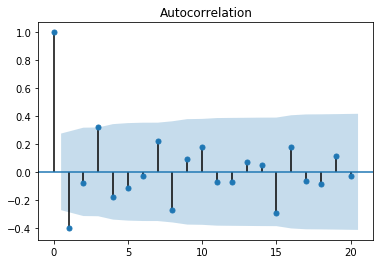

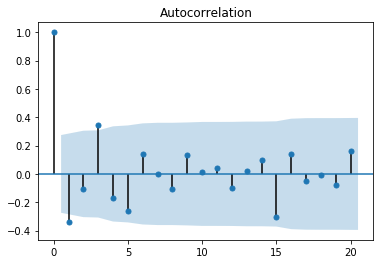

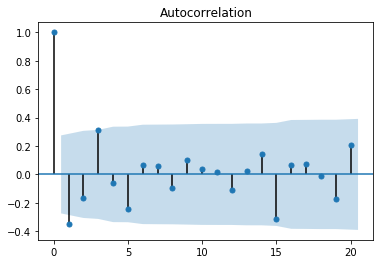

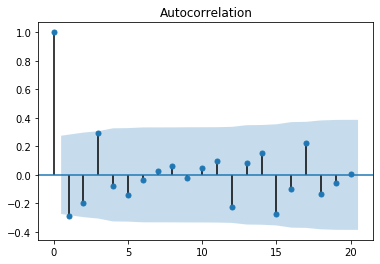

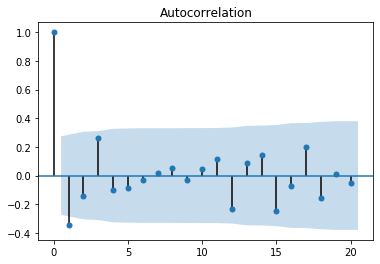

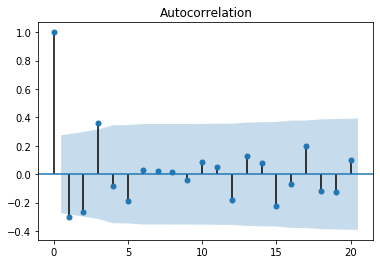

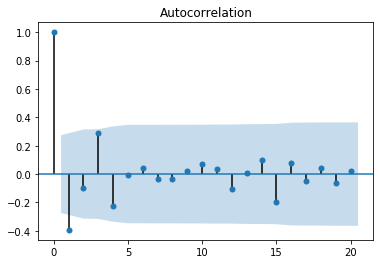

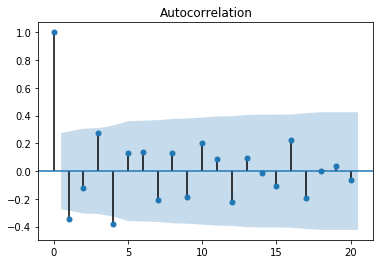

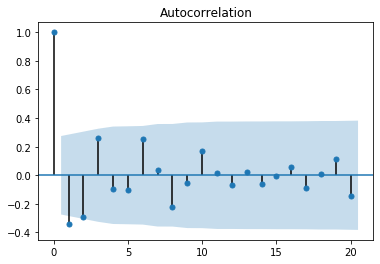

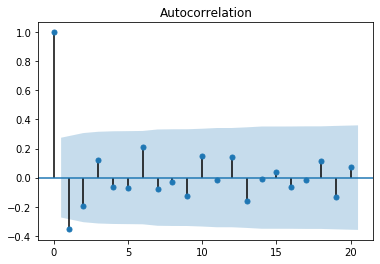

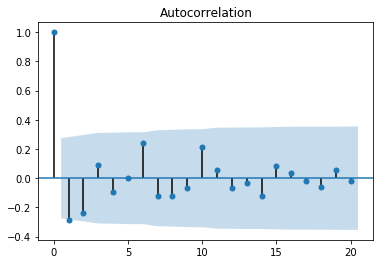

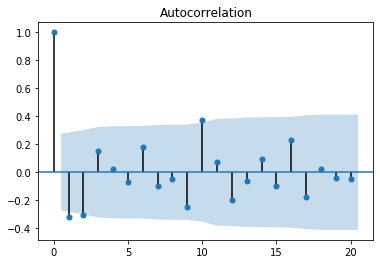

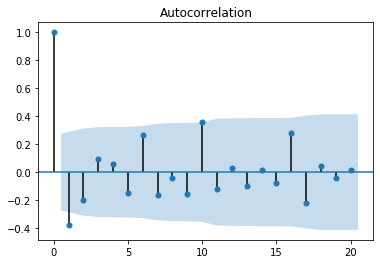

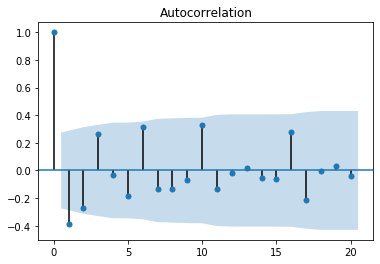

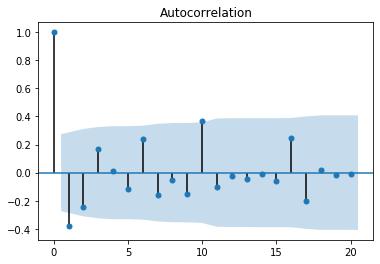

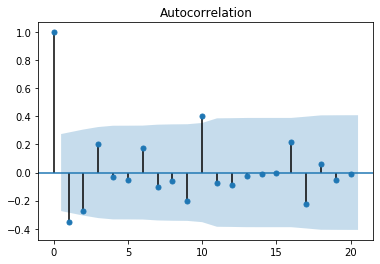

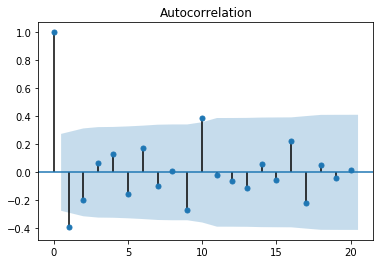

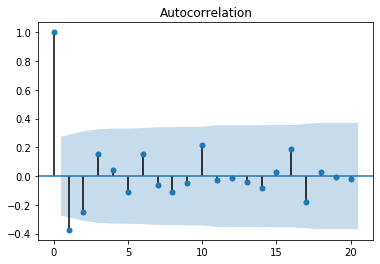

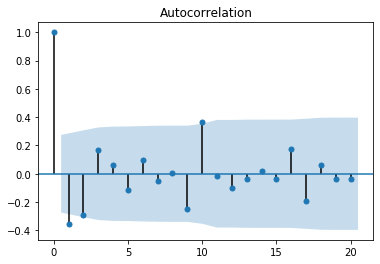

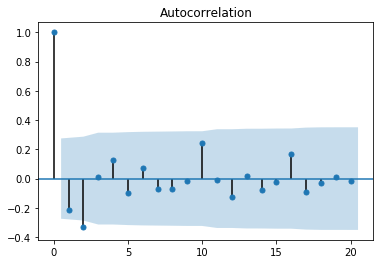

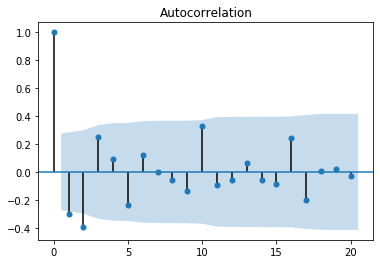

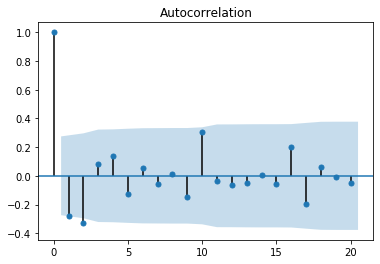

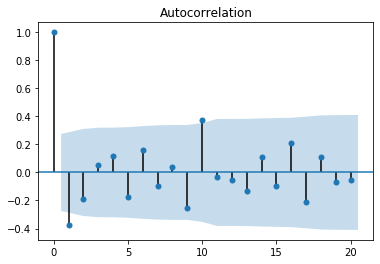

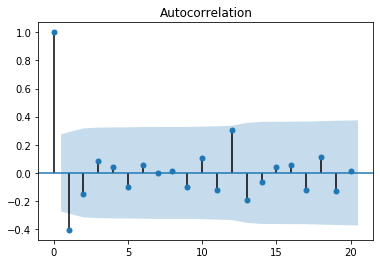

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,810.26,697.78,634.31,623.34,621.21,622.02,643.50,785.46,860.57,1104.83,...,1248.96,1267.67,1265.75,1231.92,1213.59,1231.42,1256.39,1235.27,1187.54,949.56
1,573.87,561.65,548.03,535.81,535.42,563.18,596.98,710.10,811.16,925.80,...,1068.82,1020.24,1015.01,1062.46,1005.40,1055.55,1080.12,1065.64,907.26,722.85
2,640.97,576.46,573.04,568.79,569.60,579.65,648.30,803.67,940.19,1283.74,...,1680.14,1661.22,1638.34,1592.61,1673.26,1849.07,1656.75,1653.64,1427.91,976.70
3,603.05,575.03,557.71,554.02,552.53,558.51,654.51,764.16,842.69,1122.25,...,1461.47,1523.85,1391.03,1439.68,1531.11,1615.50,1588.72,1530.74,1220.02,825.63
4,572.48,553.22,548.22,537.84,540.99,552.58,620.28,705.11,815.08,926.64,...,1175.71,1154.09,1156.97,1074.76,1097.21,1109.19,1095.54,1071.24,975.05,737.36


In [159]:
for i in range(24):
    daily_diff = daily_diff.dropna()
    plot_acf(daily_diff[i], alpha = 0.05, lags = 20, fft = False)
    plt.show()


In [161]:

auc_f =[]
for i in range(24):
    data_17 = data_17.dropna()
    auc_f.append(acf(data_17[i], nlags =20, fft = False))
auc_f = pd.DataFrame(auc_f)
#auc_f


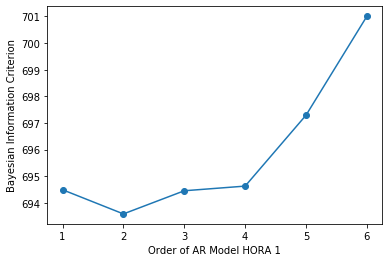

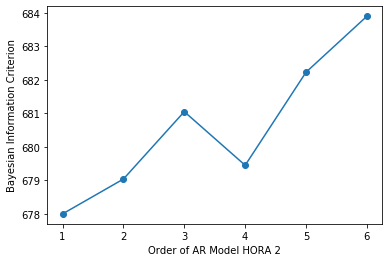

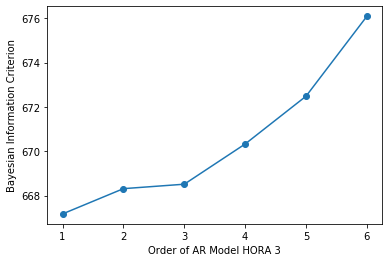

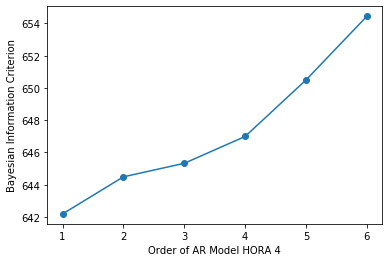

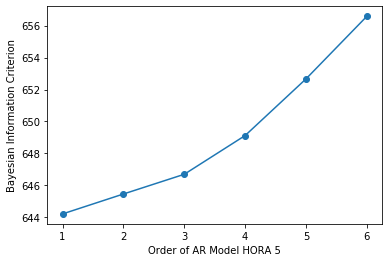

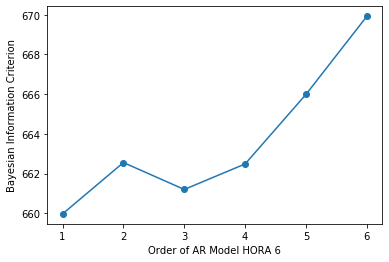

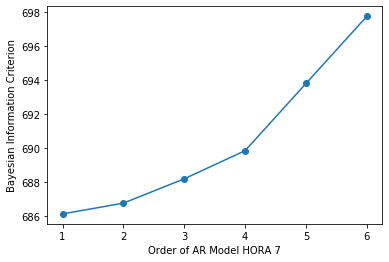

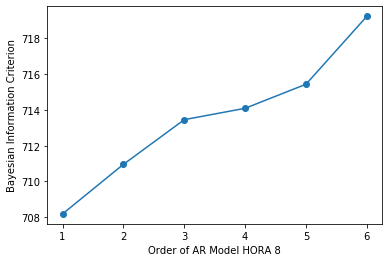

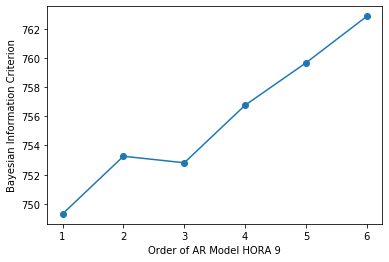

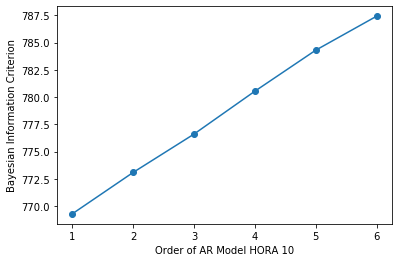

C:\Users\Operaciones F\Miniconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


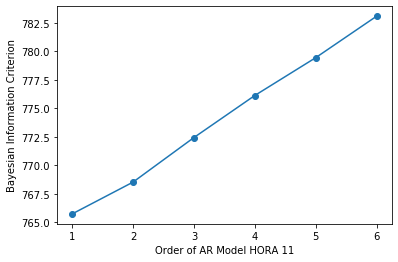

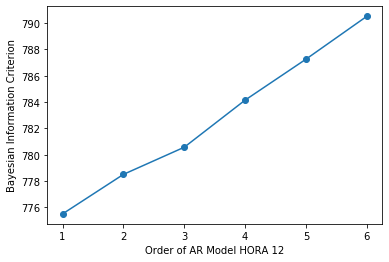

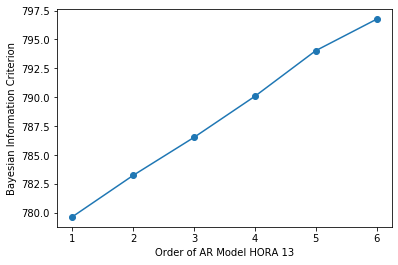

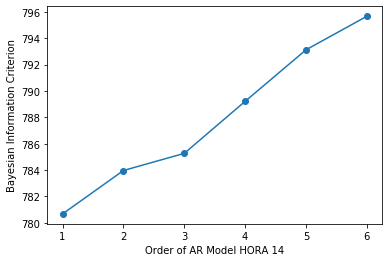

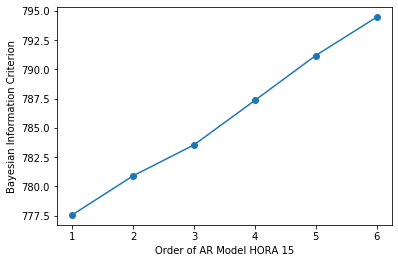

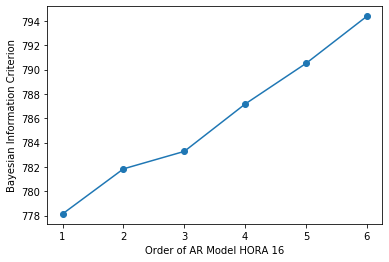

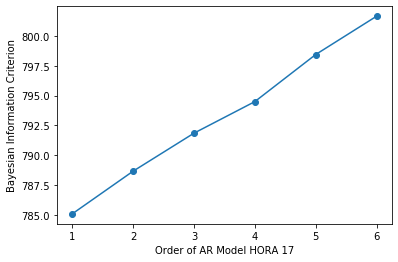

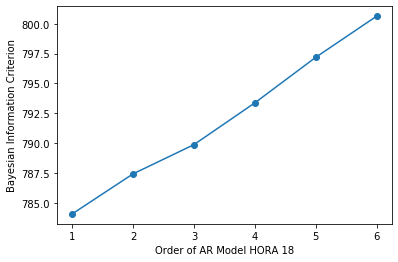

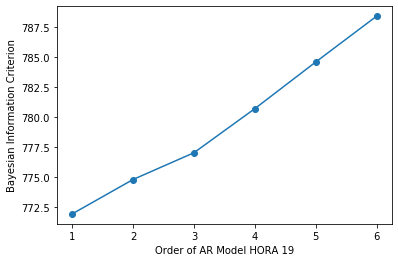

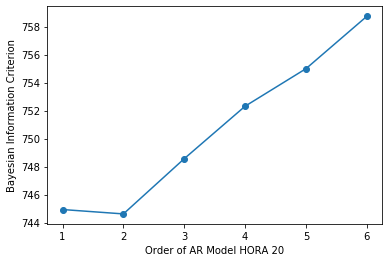

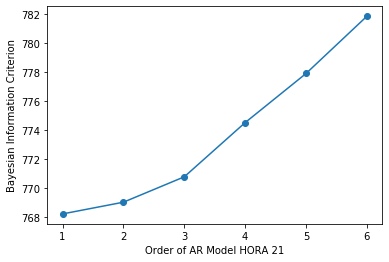

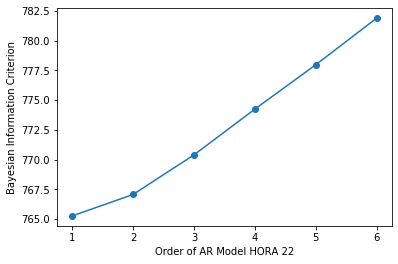

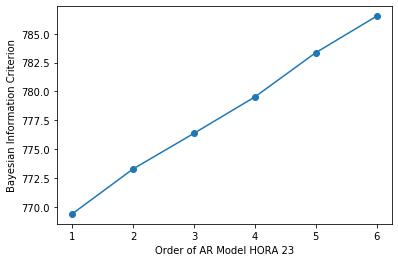

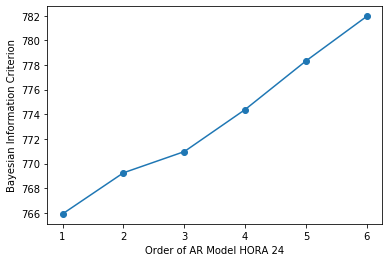

In [223]:
BIC = np.zeros(7)
data_17 = data_17.dropna()
for i in range(24):
    for p in range(7):
        mod = ARMA(data_17[i], order=(p,0))
        res = mod.fit()
    # Save BIC for AR(p)    
        BIC[p] = res.bic
        
    # Plot the BIC as a function of p
    plt.plot(range(1,7), BIC[1:7], marker='o')
    plt.xlabel('Order of AR Model'+ " " + "HORA" + " " + str(i+1))
    plt.ylabel('Bayesian Information Criterion')
    plt.show()


In [254]:
data_20 = data_20.dropna()

mod = ARMA(data_20[0], order = (1,0))
res = mod.fit()
'''
print(res.summary())
res.plot_predict(start=0, end=52)
plt.show()
'''
resp = res.predict(start=0, end=10)
resp = pd.DataFrame(resp)
resp2 = resp.iloc[0:52, ].values
resp2 = pd.DataFrame(resp2)
resp2

,0
0,380.130178
1,388.866073
2,377.207679
3,378.641561
4,386.662651
5,381.523735
6,374.496994
7,379.050830
8,377.762498
9,378.553654


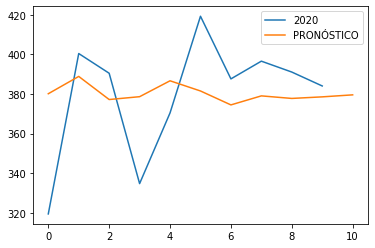

In [255]:
plt.plot(data_20[0], label=2020)
plt.plot(resp2, label='PRONÓSTICO')
plt.legend(loc=1)
plt.show()